In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        "A": [1, np.nan, 3, 4, 5],
        "B": [6, 7, 8, np.nan, 10],
        "C": [11, 12, 13, 14, 15]
    }
)

df

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df["B"])
le.transform(df["B"])

In [78]:
#元のデータを確認
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [79]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

df_ohe = df.copy()

le = LabelEncoder()

df_ohe["B"] = le.fit_transform(df_ohe["B"])

ct = ColumnTransformer([("test", OneHotEncoder(),
                            [1])], remainder="passthrough")

ct.fit_transform(df_ohe)

array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

In [80]:
import pandas as pd

df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": [100, 200, 300, 400, 500]
    }
)

df

,A,B
0,1,100
1,2,200
2,3,300
3,4,400
4,5,500


In [81]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [82]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

mmsc.fit(df)
mmsc.transform(df)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

## 分類


In [83]:
from sklearn.datasets import load_iris

irsi = load_iris()
X, y = irsi["data"], irsi["target"]

print("X:")
print(X[:5, :])
print("y:")
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


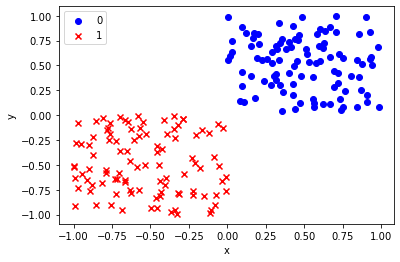

In [85]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

X0 = np.random.uniform(0, 1, size=(100, 2))
y0 = np.repeat(0, 100)

X1 = np.random.uniform(-1, 0, size=(100, 2))
y1 = np.repeat(1, 100)

fig,ax = plt.subplots()

ax.scatter(X0[:, 0], X0[:, 1], marker="o", c="blue", label="0")
ax.scatter(X1[:, 0], X1[:, 1], marker="x", c="red", label="1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [86]:
from sklearn.svm import SVC

def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))

    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker="o", c="blue", label="0")
    ax.scatter(X1[:, 0], X1[:, 1], marker="x", c="red", label="1")

    # 決定境界とマージン
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                        np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape(xx.shape)
    ax.scatter(xx, yy, p,
                color="k", label=[-1, 0, 1],
                alpha=0.5, linestyles=["--", "-", "--"])

    #SVMのプロット
    ax.scatter(svc.support_vectors_[:, 0],
                svc.support_vectors_[:, 1],
                s=250, facecolors="none",
                edgecolors="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.show()

/opt/anaconda3/envs/qualification_for_python/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


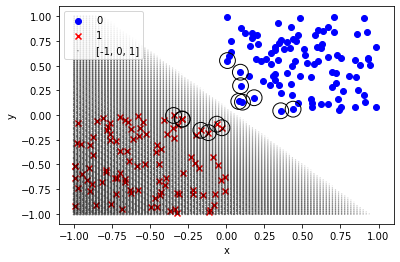

In [87]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=1)

/opt/anaconda3/envs/qualification_for_python/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


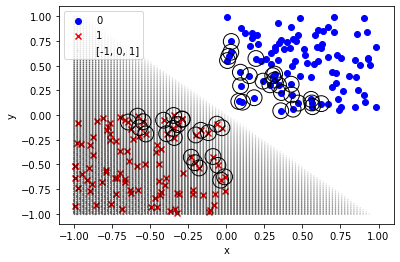

In [88]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=0.1)

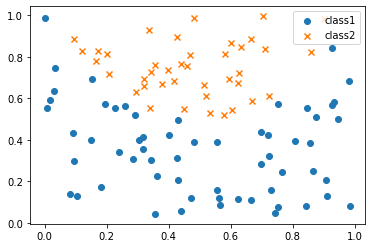

In [89]:
np.random.seed(123)
X = np.random.random(size=(100, 2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 + 0.5).astype(int)

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1], marker="o", label="class1")
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker="x", label="class2")

ax.legend()
plt.show()

/opt/anaconda3/envs/qualification_for_python/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


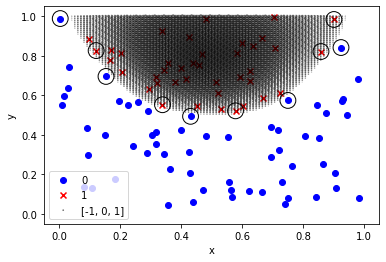

In [90]:
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="rbf", C=1e3, xmin=0, ymin=0)

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True,
                            rounded=True,
                            class_names=["Setosa",
                                            "Versicolor",
                                            "Virginica"],
                            feature_names=["Sepal length",
                                            "Sepal width",
                                            "Petal length",
                                            "Petal width"],
                            out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png("/Users/haratodaisuke/Library/Mobile Documents/com~apple~CloudDocs/working/python/資格/python_データ分析/tree.png")

In [11]:
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=123)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## 回帰

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

lr = LinearRegression()

lr.fit(X_train, y_train)

In [21]:
y_pred = lr.predict(X_test)

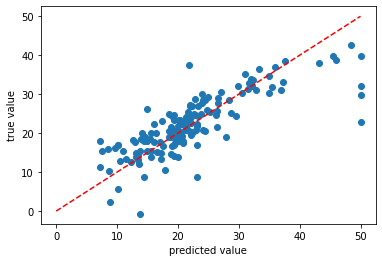

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot((0, 50), (0, 50), c="red", linestyle="dashed")
ax.set_xlabel("predicted value")
ax.set_ylabel("true value") 
plt.show()

## 次元削減

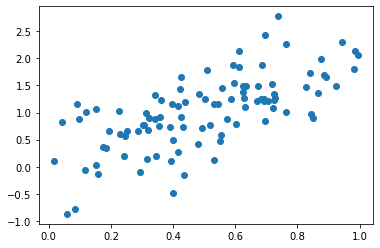

In [25]:
#主成分分析
import numpy as np
import pandas as pd

np.random.seed(123)
X = np.random.random(size=100)
Y = 2*X + 0.5*np.random.randn(100)

fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.show()

In [26]:
from sklearn.decomposition import PCA

pca =  PCA(n_components=2)

x_pca = pca.fit_transform(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))

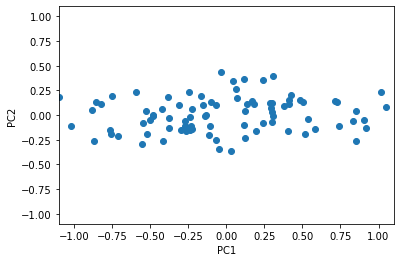

In [27]:
fig, ax = plt.subplots()
ax.scatter(x_pca[:, 0], x_pca[:, 1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

## モデルの評価

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

svc = SVC()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()

cross_val_score(svc, X, y, cv=10, scoring="precision")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

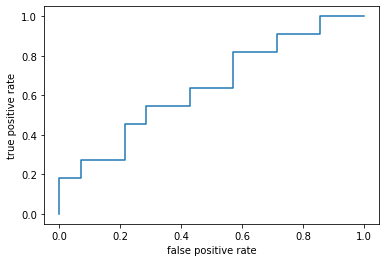

In [38]:
import numpy as np
import pandas as pd

fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6,
                6, 7, 8, 8, 8, 9, 10, 10, 11, 12, 12, 13, 14]) / 14
tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7,
                7, 7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11]) / 11

fig, ax = plt.subplots()
ax.step(fpr, tpr, where="post")
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
plt.show()

## ハイパーパラメータ

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = DecisionTreeClassifier()
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]}

cv = GridSearchCV(clf, param_grid, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]})

In [40]:
cv.best_params_

{'max_depth': 3}

In [43]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [44]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## クラスタリング

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data

X = data[:100, [0,2]]

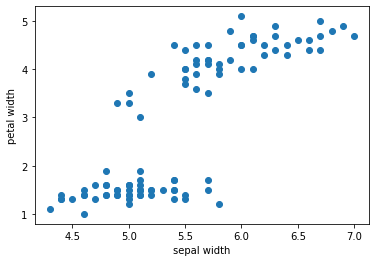

In [51]:
import pandas as pd

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel("sepal width")
ax.set_ylabel("petal width")
plt.show()

In [52]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init="random", n_init=10, random_state=123)
y_km = km.fit_predict(X)

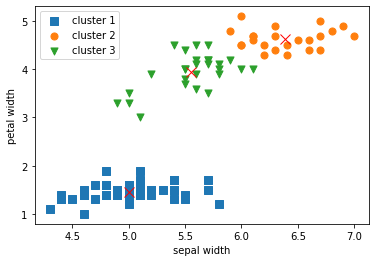

In [58]:
import numpy as np
import pandas as pd
fig, ax = plt.subplots()

#クラスター1
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50,
            marker="s", label="cluster 1")
ax.plot(np.mean(X[y_km == 0, 0]), np.mean(X[y_km == 0, 1]),
            marker="x", markersize=10, color="red")

#クラスター２
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50,
            marker="o", label="cluster 2")
ax.plot(np.mean(X[y_km == 1, 0]), np.mean(X[y_km == 1, 1]),
            marker="x", markersize=10, color="red")

#クラスター3
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50,
            marker="v", label="cluster 3")
ax.plot(np.mean(X[y_km == 2, 0]), np.mean(X[y_km == 2, 1]),
            marker="x", markersize=10, color="red")

ax.set_xlabel("sepal width")
ax.set_ylabel("petal width")
ax.legend()
plt.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

labels = ac.fit_predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1])

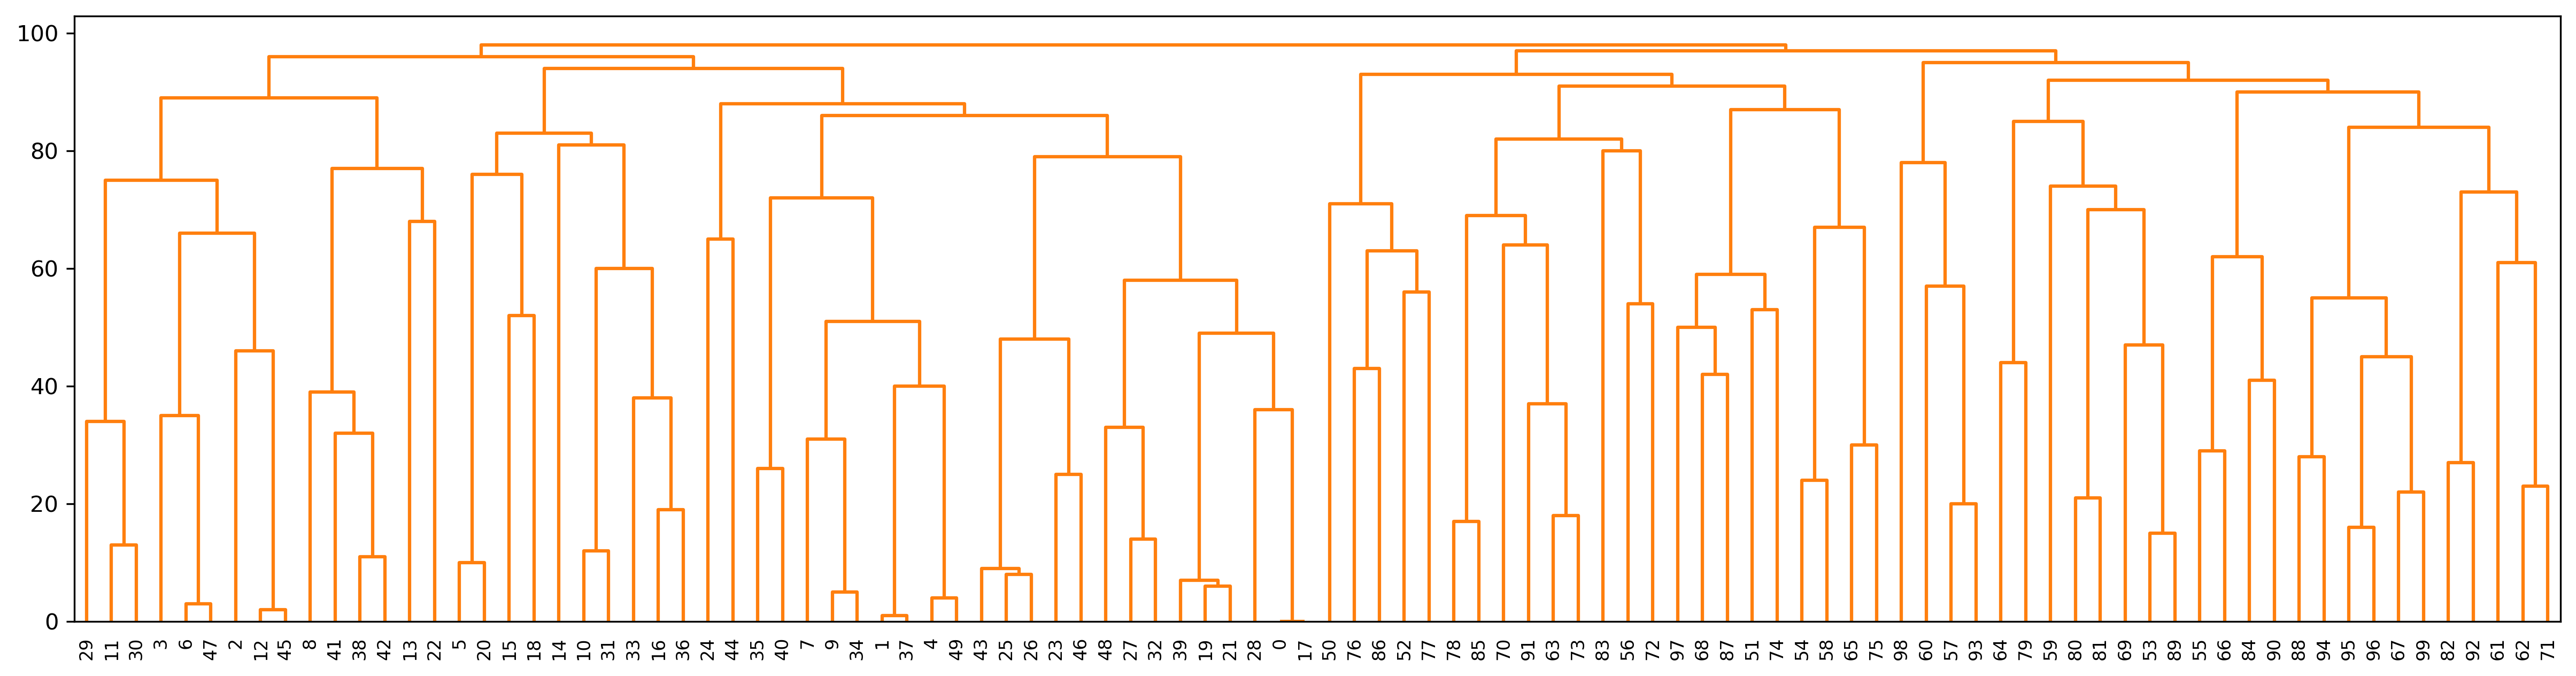

In [60]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

children = ac.children_

distance = np.arange(children.shape[0])

no_of_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.hstack((children,
                            distance[:, np.newaxis],
                            no_of_observations[:, np.newaxis])).astype(float)


fig, ax = plt.subplots(figsize=(20, 5), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8, color_threshold=np.inf)

plt.show()